# Exploração e limpeza de dados
Focus in a __data science__ and __data analytics__, using *Pandas* with *DataSets* of: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
df = pd.read_excel("default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [7]:
print("Quantidade de linhas e colunas: ", df.shape)
print()
# print(df.head())  # Ver as 5 primeiras linhas do DataFrame

print("Quantidade de linhas:", df.shape[0])
print("Quantidade de dados exclusivos de cada linha da coluna \"ID\":", len(df['ID'].unique()))

qnt_id = df['ID'].value_counts()  # value_counts() / groupby|count do SQL
print("")
print("1 - ids unicos\n2 - ids repetidos", qnt_id.value_counts())  # retornando quantos ids repetidos há
print("")

Quantidade de linhas e colunas:  (30000, 25)

Quantidade de linhas: 30000
Quantidade de dados exclusivos de cada linha da coluna "ID": 29687

1 - ids unicos
2 - ids repetidos count
1    29374
2      313
Name: count, dtype: int64



In [8]:
# Mascara Booleana
mascara_ids = qnt_id == 2  # armazendo em bool os ids são repetidos
print("True - Id repetido", mascara_ids[:5], end="\n\n")

print("Index dos ids duplicados:\n", qnt_id.index[mascara_ids][:5], end="\n\n")  # retornando o index dos ids duplicados
ids_duplicados = qnt_id.index[mascara_ids]
ids_duplicados = list(ids_duplicados)
print("IDs duplicados: ", len(ids_duplicados))
print("Dados do ids duplicados:")
print(df.loc[df['ID'].isin(ids_duplicados[0:3]), :].head(3))  # .loc e .isin permitem uma melhor visualização do DataFrame a partir do index


True - Id repetido ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

Index dos ids duplicados:
 Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

IDs duplicados:  313
Dados do ids duplicados:
                  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
5033   89f8f447-fca8     320000    2          2         1   32     0      0   
5133   89f8f447-fca8          0    0          0         0    0     0      0   
16727  1fb3e3e6-a68d      80000    1          2         2   33     2      2   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
5033       0      0  ...     169371     172868     150827      8000      8000   
5133       0      0  ...          0          0          0         0         0   
16727      0      0  ...      27394      29922      31879         0      20

In [9]:
# Removendo registro inválidos (só há "0" nos dados)
mascara_df_zero = df == 0  # retorna True onde houver "0" dentro do dataframe
print("True - 0")
print(mascara_df_zero[0:10])
print("")

True - 0
      ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_1  PAY_2  PAY_3  \
0  False      False  False      False     False  False  False  False  False   
1  False      False  False      False     False  False  False  False   True   
2  False      False  False      False     False  False   True   True   True   
3  False      False  False      False     False  False   True   True   True   
4  False      False  False      False     False  False  False   True  False   
5  False      False  False      False     False  False   True   True   True   
6  False      False  False      False     False  False   True   True   True   
7  False      False  False      False     False  False   True  False  False   
8  False      False  False      False     False  False   True   True  False   
9  False      False  False      False     False  False  False  False  False   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  False  ...       True       True      

In [10]:
# verificando se há linhas inteirissas de 0.
linhas_invalidas = mascara_df_zero.iloc[:, 1:].all(axis=1)
print("Linha inválida - True\n", linhas_invalidas)
# .iloc metodo de indexacao de inteiros
# : <-> todas as linhas  1: <-> apartir da coluna 1
# all() retorna True se todas as colunas == True
print("\nTotal de linhas inválidas:", sum(linhas_invalidas))  # True = 1

Linha inválida - True
 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

Total de linhas inválidas: 315


In [11]:
# Limpando as linhas inválidas do DataFrame
df_limpo_1 = df.loc[~linhas_invalidas, :].copy()  # ~ -> not | Copiamos todas linhas que não são True, não são inválidas

print("\n\nLimpeza de DataFrame realizada:")
print("Linhas totais no novo DataFrame - ", df_limpo_1.shape[0], "|", "IDs Únicos - ", df_limpo_1['ID'].nunique())

# Verificando mais colunas
print("\nID  PAY_1\n", df_limpo_1['PAY_1'].head(3))
print("")
print("Quantidade por tipos de dados na coluna:", df_limpo_1['PAY_1'].value_counts())
# Not Available: Pandas add simbolizando um valor ausente



Limpeza de DataFrame realizada:
Linhas totais no novo DataFrame -  29685 | IDs Únicos -  29685

ID  PAY_1
 0     2
1    -1
2     0
Name: PAY_1, dtype: object

Quantidade por tipos de dados na coluna: PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64


In [12]:
# Mascara Booleana
print("")
pagamentos_validos_mascara = df_limpo_1['PAY_1'] != "Not available"
print("Valore válidos (sem \"Not available\"):", sum(pagamentos_validos_mascara))

df_limpo_2 = df_limpo_1.loc[pagamentos_validos_mascara, :].copy()
print("Novo DataFrame:", df_limpo_2.shape)

# Convertendo o tipo da coluna de "Object" para "Int64"
print("")
df_limpo_2['PAY_1'] = df_limpo_2['PAY_1'].astype("int64")  # astype converter o tipo de dados da coluna
print("Infos PAY_1")
print(df_limpo_2['PAY_1'].info())
print("")


Valore válidos (sem "Not available"): 26664
Novo DataFrame: (26664, 25)

Infos PAY_1
<class 'pandas.core.series.Series'>
Index: 26664 entries, 0 to 29999
Series name: PAY_1
Non-Null Count  Dtype
--------------  -----
26664 non-null  int64
dtypes: int64(1)
memory usage: 416.6 KB
None



           LIMIT_BAL           AGE
count   26664.000000  26664.000000
mean   167919.054905     35.505213
std    129839.453081      9.227442
min     10000.000000     21.000000
25%     50000.000000     28.000000
50%    140000.000000     34.000000
75%    240000.000000     41.000000
max    800000.000000     79.000000


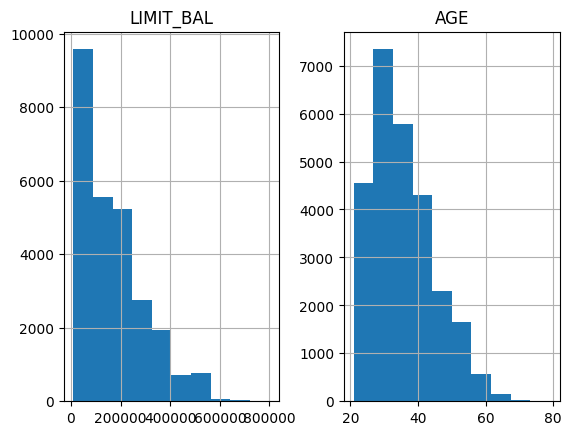

In [17]:
# histogramas
mpl.rcParams["figure.dpi"] = 100  # alta resolução de imagem
df_limpo_2[['LIMIT_BAL', 'AGE']].hist()  # gerando um histograma do limite de credito e da idade
print(df_limpo_2[['LIMIT_BAL', 'AGE']].describe())  # relatorio tabular

In [18]:
# limpando coluna education
print("")
print("De acordo com o dicionario de dados 0, 5 e 6 não correspondem a nenhum grau de educação\n"
      "vamos mover eles para o grau \"outros\" [4]")
print(df_limpo_2['EDUCATION'].value_counts())
df_limpo_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)  # inplace -> não cria um dataFrame novo, apenas altera o existente
print(df_limpo_2['EDUCATION'].value_counts())  # df limpo



De acordo com o dicionario de dados 0, 5 e 6 não correspondem a nenhum grau de educação
vamos mover eles para o grau "outros" [4]
EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64
EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64


In [19]:
# limpando coluna marriage
print("")
print("De acordo com o dicionario de dados 0 não correspondem a nenhum valor de estado civil\n"
      "vamos mover eles para o estado de \"outros\" [3]")
print(df_limpo_2['MARRIAGE'].value_counts())
df_limpo_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
print(df_limpo_2['MARRIAGE'].value_counts())  # df limpo
print("")


De acordo com o dicionario de dados 0 não correspondem a nenhum valor de estado civil
vamos mover eles para o estado de "outros" [3]
MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64
MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64



In [20]:
# inverteremos as classificações para aplicar um one-hot encoding melhor para o modelo que iremos criar
print("Criando uma coluna com string ao invés de números para classificar o grau estudo:")
df_limpo_2['EDUCATION_CAT'] = 'none'

cat_mapping = {  # relação
      1: "graduate school",
      2: "university",
      3: "high school",
      4: "others"
}
df_limpo_2['EDUCATION_CAT'] = df_limpo_2['EDUCATION'].map(cat_mapping)  # .map -> mapeia os valores antigos e atribui aos novos os valores de acordo com o dicionario
print(df_limpo_2[['EDUCATION_CAT', 'EDUCATION']].head(10))

print("\nCodificao one-hot encoding:")
education_ohe = pd.get_dummies(df_limpo_2['EDUCATION_CAT'])  # get_dummies -> recebe uma coluna de DF e retorna um novo DF com um num igual de colunas e níveis de variável categórica. Variáveis dummy.
print(education_ohe.head(10))

print("\nConcatenando o DF de codificação one-hot com o original")
df_ohe = pd.concat(objs=[df_limpo_2, education_ohe], axis=1)  # axis=1 -> para que sejam concatenados horizontalmente, eixo da coluna.
print(df_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10))

df_ohe.to_csv('dados_explorados_e_limpos.csv')  # salvando o DF limpo e codificado em um arquivo CSV
print("")

Criando uma coluna com string ao invés de números para classificar o grau estudo:
     EDUCATION_CAT  EDUCATION
0       university          2
1       university          2
2       university          2
3       university          2
4       university          2
5  graduate school          1
6  graduate school          1
7       university          2
8      high school          3
9      high school          3

Codificao one-hot encoding:
   graduate school  high school  others  university
0            False        False   False        True
1            False        False   False        True
2            False        False   False        True
3            False        False   False        True
4            False        False   False        True
5             True        False   False       False
6             True        False   False       False
7            False        False   False        True
8            False         True   False       False
9            False         True   False

Novo DF: (26664, 31)
Estatisticas:
              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  26664.000000  26664.000000  26664.000000  26664.000000  26664.000000   
mean      -0.017777     -0.133363     -0.167679     -0.225023     -0.269764   
std        1.126769      1.198640      1.199165      1.167897      1.131735   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  26664.000000  
mean      -0.293579  
std        1.150229  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000  

agrupando e ordenando os valores de 'PAY_1
 PAY_1
-2  

<Axes: >

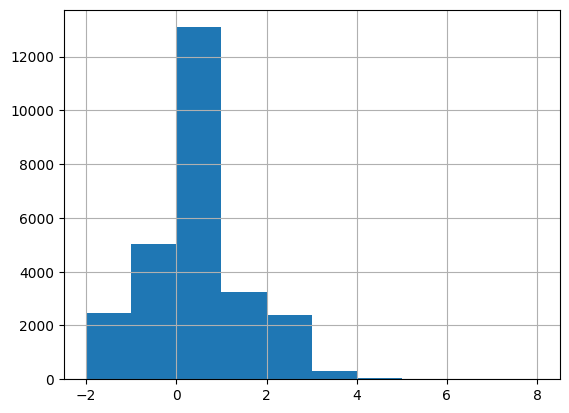

In [21]:
# verificando o historico financeiro
df = pd.read_csv('dados_explorados_e_limpos.csv')
print("Novo DF:", df.shape)
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

print("Estatisticas:")
print(df[pay_feats].describe())

print("\nagrupando e ordenando os valores de 'PAY_1\n", df[pay_feats[0]].value_counts().sort_index())
df[pay_feats[0]].hist()

In [23]:
import numpy as np


 [-2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


Text(0, 0.5, 'Números de contas')

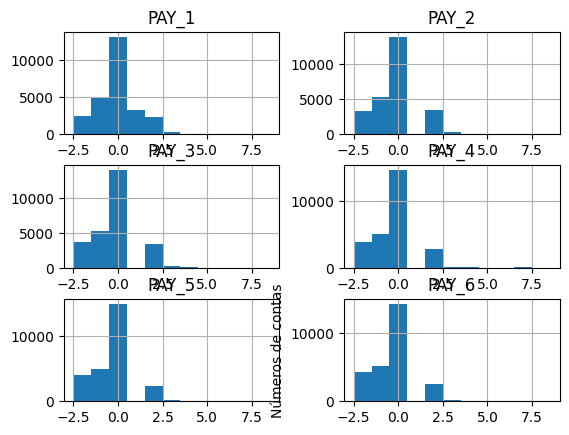

In [25]:
# bins do histograma
pay_1_bins = np.array(range(-2, 10)) - 0.5
print("\n", pay_1_bins)

df[pay_feats].hist(bins=pay_1_bins)
plt.ylabel("Números de contas")